## CCNSS 2018 Module 4: High dimensional representations and neural dynamics
# Tutorial 2: Visualization and tools to characterize high-dimensional spaces

[source](https://colab.research.google.com/drive/1OouBcak6NF3hli4cDwfZZwdrVSuzKxS1)

*Please execute the cell bellow in order to initialize the notebook environment*

In [3]:
import matplotlib.pyplot as plt    # import matplotlib
import matplotlib as mp
import numpy as np                 # import numpy
import math                        # import basic math functions
import random                      # import basic random number generator functions
#from google.colab import files
from scipy.io import loadmat 
from mpl_toolkits.mplot3d import Axes3D

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

In [4]:
!if [ ! -d data ]; then git clone https://github.com/ccnss/ccnss2018_students; \
                        cp -rf ccnss2018_students/module4/2_pca_data/data ./; fi
import os



data_folder = 'data'

print('Available data files:', ' '.join(os.listdir('data')))

Available data files: .DS_Store ps8_data.mat


# Objectives

In this notebook we will analyze real high-dimensional data sets and find low-dimensional subspaces that characterize the data. We will relate the eigenvalues of the covariance matrix to the variance of the data and how we can use this to approximate the dimension of the subspace where the data resides.  

## Background

We will continue the previous tutorial on PCA. We we will look at high dimensional spike-count data. In particular, we will:


* Use spike-count data and calculate its principal components.
* We will calculate and plot the eigenvalue spectrum and qualitatively and quantitatively reduce the dimensionality of the data set. 
* Use factor analysis applied on the same data set and compare the results to the results obtained with PCA


In the first three exercises, we will characterize the data "blindly", i.e., without regards to its content. 




**EXERCISE 1**

• Import the data from using the function "loadmat" from the the scipy package. The data is a 728 × 97 matrix of real data, where each row is a spike count vector across 97 simultaneously-recorded neurons. We are providing you here with the spike counts rather than the raw spike trains, where the spike counts are taken in a 200 ms bin during the plan period. (data courtesy from the Krishna Shenoy Lab). D = 97 is the dimensionality of the data. 



In [14]:
data_file = os.path.join(data_folder, 'ps8_data.mat')
data_all = loadmat(data_file)
data_matrix = data_all['Xplan']
shape = np.shape(data_matrix)
print(shape)

(728, 97)



- Calculate the covariance matrix for this data and print the output.


In [19]:
#Insert code here

cov_matrix = np.cov(np.transpose(data_matrix))
print(cov_matrix)

[[ 5.48868412  0.63116715 -0.70569252 ...  1.60639653  1.39476359
   0.6593879 ]
 [ 0.63116715  1.70214603 -0.15389906 ...  0.4417163   0.09705133
   0.14528886]
 [-0.70569252 -0.15389906  1.43159454 ... -0.54962438 -0.73256798
  -0.22764787]
 ...
 [ 1.60639653  0.4417163  -0.54962438 ... 12.10523263  1.35439749
   1.48400963]
 [ 1.39476359  0.09705133 -0.73256798 ...  1.35439749  3.77864587
   0.68621045]
 [ 0.6593879   0.14528886 -0.22764787 ...  1.48400963  0.68621045
   3.36812242]]


###Expected output:###
```
Y(cov_matrix) =  [[ 5.48114471  0.63030016 -0.70472316 ...  1.60418994  1.39284771
   0.65848214]
 [ 0.63030016  1.69980792 -0.15368766 ...  0.44110954  0.09691802
   0.14508929]
 [-0.70472316 -0.15368766  1.42962806 ... -0.5488694  -0.73156171
  -0.22733516]
 ...
 [ 1.60418994  0.44110954 -0.5488694  ... 12.08860456  1.35253706
   1.48197115]
 [ 1.39284771  0.09691802 -0.73156171 ...  1.35253706  3.77345543
   0.68526786]
 [ 0.65848214  0.14508929 -0.22733516 ...  1.48197115  0.68526786
   3.36349588]]
```

**EXERCISE 2**

- Plot the eigenvalue spectrum. **Hint**: use the function np.linalg.eig.

 If you had to identify an
elbow in the eigenvalue spectrum, how many dominant eigenvalues would there be? 

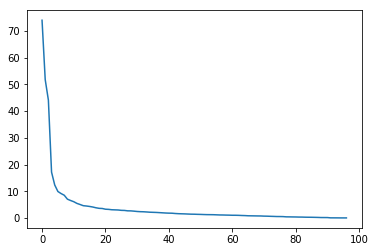

In [29]:
# Insert code here
eig_val, eig_vec = np.linalg.eig(cov_matrix)
idx = eig_val.argsort()[::-1]   
eigenValues = eig_val[idx]
eigenVectors = eig_vec[:,idx]

plt.plot(eigenValues)
plt.show()

### Expected output:###


![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/2_pca_data/figures/Mod4T2E2.png)

**EXERCISE 3**

- What percentage of the overall variance is captured by the top 3 principal components (corresponding to the three dominant eigenvalues)?
Hint: The overall variance is given by the trace of the covariance matrix, which coincides with the sum of the eigenvalues. 


In [25]:
# Insert code here
np.sum(eigenValues[:3])/np.sum(eigenValues)

0.4479099355314796

### Expected output:###


```
3eigval_percent =  44.790993553148
```



- Plot the fraction of explained variance as a function of eigenvalue/principal component number (The x axis is thus serially ordered: 1, 2, ..97.). On top of that plot, plot the cumulative variance. How many principal components do you need to explain 80% of the variance? 

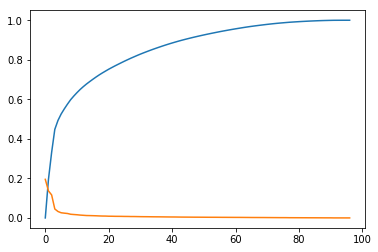

In [35]:
# Insert code here
D = cov_matrix.shape[0]

v_accum = np.zeros(D)
v_frac = np.zeros(D)
for i in range(D):
    
    v_accum[i] = np.sum(eigenValues[:i])/np.sum(eigenValues)
    v_frac[i] = eigenValues[i]/np.sum(eigenValues)
    
plt.plot(np.arange(D), v_accum)
plt.plot(np.arange(D), v_frac)
plt.show()

### Expected output:###

![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/2_pca_data/figures/Mod4T2E3.png)


- Check that the three eigenvectors are orthogonal. 

In [36]:
# Insert code here
print(np.dot(eigenVectors[:,0], eigenVectors[:,1]))
print(np.dot(eigenVectors[:,1], eigenVectors[:,2]))
print(np.dot(eigenVectors[:,2], eigenVectors[:,3]))

-4.718447854656915e-16
8.187894806610529e-16
2.636779683484747e-16


### Expected output:###
```12dot =  3.622102617839573e-15
23dot =  -1.8370721610594387e-15
13dot =  -4.996003610813204e-16```

**EXERCISE 4**

##Background:
We will now look at the data set more closely. The data set was collected during a reaching task for which there were 8 reaching angles in total. There are 91 trials for each of 8 reaching angles, for a total of 728 trials. Trials 1 to 91 correspond
to reaching angle 1, trials 92 to 182 correspond to reach angle 2, etc.

For the purposes of visualization, we’ll consider the PC space defined
by the top M = 3 eigenvectors and project the data into the three-dimensional PC
space. 

- First, write a function "projections" that returns projections of a matrix onto an aribitrary vector. Calculate the projection of the data matrix onto each of the 3 principal components. Print the variance of each of the projections.



In [39]:
# insert code here
def projections(data_matrix, vectors):
    return np.dot(data_matrix, vectors)

vector3 = eigenVectors[:, :3]
projected = projections(data_matrix, vector3)
np.var(projected, 0)

array([73.92634407, 51.72433194, 44.06674037])

### Expected output ###
```
var1 = 73.92634407392778
var2 = 51.72433194336624
var3 = 44.066740370624785
```



- Plot the projected points in matplotlib using ax = fig.add_subplot(111, projection='3d') and ax.scatter
 , and color each dot
appropriately according to reaching angle (there should be a total of 728 dots, 91 for each angle). Show a view in
which the clusters are well-separated by using ax.view_init(a) where a is a rotation angle. 


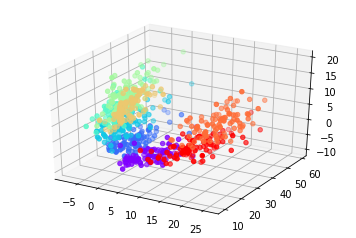

In [44]:
## Insert code here
fig = plt.gcf()
ax = fig.add_subplot(111, projection='3d')
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, int(728/91)))
for i in range(int(728/91)):
    ax.scatter(projected[i*91:(i+1)*91,0], projected[i*91:(i+1)*91,1], projected[i*91:(i+1)*91,2], c=colors[i])
plt.show()

###Expected output ###
![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/2_pca_data/figures/Mod4T2E4.png)

- How does the variance of the projections along the eigenvectors relate to the corresponding eigenvalues?

In [47]:
## Insert code here
print(np.var(projected[:, 0]))
print(np.var(projected[:, 1]))
print(np.var(projected[:, 2]))
print(eigenValues[0])
print(eigenValues[1])
print(eigenValues[2])

73.92634407392775
51.72433194336624
44.06674037062481
74.0280309296003
51.79547958015219
44.12735486907146


- In the 3-PC space, plot the centroid of the dot pattern, for each angle. The centroid is essentially the mean over the three directions. You should obtain a plot with 8 colored dots. \

How do you think these clusters map onto physical (reach angle space)?

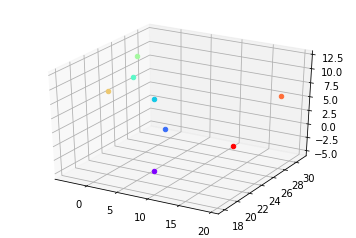

In [49]:
### Insert code here

fig = plt.gcf()
ax = fig.add_subplot(111, projection='3d')
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, int(728/91)))

mean3d = np.zeros((int(728/91), 3))
for i in range(int(728/91)):
    mean3d[i,:] = np.mean(projected[i*91:(i+1)*91,:], 0)

for i in range(int(728/91)):
    ax.scatter(mean3d[i,0],mean3d[i,1],mean3d[i,2], c=colors[i])
plt.show()

###Expected output ###
![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/2_pca_data/figures/Mod4T2E4b.png)

- Plot the projections of the centroids onto PC1 as a function of angle/stimulus index. This constitutes a tuning curve for the population. 

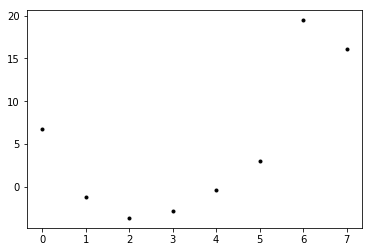

In [52]:
### Isert code here
plt.plot(np.arange(8), mean3d[:,0], 'k.')

###Expected output ###
![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/2_pca_data/figures/Mod4T2E4c.png)

- BONUS: Plot the single-neuron tuning curves for the neurons that:
1) contribute most and 2) least to the variance in PC1. Hint: Use np.argmax(np.abs(PC1)) and np.argmin(np.abs(PC1))to obtain the indices of these neurons. 

###Expected output ###
![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/2_pca_data /figures/Mod4T2E4d.png)

STILL HAVE TIME? Optional Exercise:


In this exercise, you will apply PCA to a few training examples included in the well-known data set: the MNIST data set of handwritten digits. First, execute the cell below to import the MNIST data set. After executing the cell, the **only variables** you will use are: 
 **x_train** (an array of 14x14 images containing examples of the digits 0-5) and **y_train** (a vector of indices for the five digits)
 
 

In [0]:
import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train[:, ::2, ::2].copy()
x_test = x_test[:, ::2, ::2].copy()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_shape = x_train.shape[1:]

# keep only certain classes
x_train = x_train[(y_train==0) | (y_train==1) | (y_train==2) | (y_train==3)
                  | (y_train==4) | (y_train==5)]
y_train = y_train[(y_train==0) | (y_train==1) | (y_train==2) | (y_train==3)
                  | (y_train==4) | (y_train==5)]

x_test = x_test[(y_test==0) | (y_test==1) | (y_test==2) | (y_test==3)
                  | (y_test==4) | (y_test==5)]
y_test = y_test[(y_test==0) | (y_test==1) | (y_test==2) | (y_test==3)
                  | (y_test==4) | (y_test==5)]

- make new arrays x_train_0 and x_train_1 that contain only the digits "0" and "1", respectively. Plot the first three images for each array, i.e., the first three "0"s and first three "1"s. Hint: Use the vector y_train for this. 

In [0]:
## insert code here

###Expected output ###
![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/2_pca_data/figures/Mod4T2E5.png)

###Expected output ###
![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/2_pca_data /figures/Mod4T2E5a.png)

- Given the arrays x_train_0 and x_train_1 above, form a new array x_train_01 that concatenates both arrays. Hint: Use the function np.vstack. Print the shape of your new array x_train_01 . 


### Expected ouput ###
```
(12665, 14, 14)
```


We will perform PCA on this new array x_train01. For this, we will import the function *decomposition* from the library *sklearn* to peform PCA on our data set. Note that to compute PCA we first need to reshape our images of dim 14x14 and transform them into vectors of length 196. Execute the cell below

In [0]:
from sklearn import decomposition

input_train = x_train_01.reshape((len(x_train_01), np.prod(x_train_01.shape[1:])))

pca = decomposition.PCA(n_components=2).fit(input_train)

output_train = pca.transform(input_train)
output_train_inv = pca.inverse_transform(output_train)

The relevant variables from this cell are: 
 output_train (result of PCA transform on your input)
 output_train_inv (result of recovering the original variable after having selected its two first components). Print the shapes of these two variables. 

- Plot the first image stored in output_train_inv. Hint: Note that the shape of the images are now vectors; you need to reshape these images to obtain images with dim 14x14. Use the function np.reshape as np.reshape(vector, shape), where vector is your input vector, and shape is the new shape you want to transform the vector to (in this case, 14x14).

How does this recoved image compare to the original one?

###Expected output ###
![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/2_pca_data/figures/Mod4T2E5a.png)

- The variable output_train contains the projections of the "0" and "1" images onto the principal components. Plot the first 500 images for each set of "0" and "1", using two different colors, respectively. Are the clusters well separated? 

###Expected output ###
![](https://github.com/ccnss/ccnss2018_students/raw/master/module4/2_pca_data/figures/Mod4T2E5b.png)